<a href="https://colab.research.google.com/github/JJnotJimmyJohn/NLPwithPyTorchBook/blob/master/PerceptronExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

%matplotlib inline
# get data
# validation/test data
# define model
# batches(1 batch this case)
# epochs, learning rate
# run data through model
# get error
# backward
# update parameter (step)
# run data again
# ...run until stop criteria is reached

# Get Data

In [3]:
LEFT_CENTER = (3,3)
RIGHT_CENTER = (3,-2)
seed = 1337

torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)

In [4]:
def get_toy_data(batch_size,left_center=LEFT_CENTER,right_center=RIGHT_CENTER):
  x_data = []
  # default class is 0
  y_targets = np.zeros(batch_size)
  for batch_i in range(batch_size):
    if np.random.random_sample()>0.5:
      x_data.append(np.random.normal(left_center))
    else:
      x_data.append(np.random.normal(right_center))
      y_targets[batch_i] = 1
  return torch.tensor(x_data,dtype=torch.float32),torch.tensor(y_targets,dtype=torch.float32)

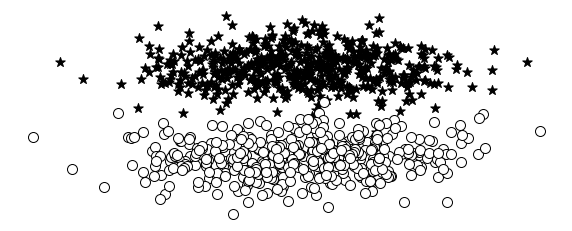

In [5]:
#@title Default title text
# get data
x_data,y_truth = get_toy_data(1000)

# transfer to numpy arrays for plot
x_data = x_data.numpy()
y_truth = y_truth.numpy()

# "*" represents 0
# "O" represents 1
star_class=x_data[np.where(y_truth==0)]
o_class=x_data[np.where(y_truth==1)]

# plot
_, ax = plt.subplots(1, 1, figsize=(10,4))

ax.scatter(star_class[:, 0], star_class[:, 1], color='black', marker='*', s=100)
ax.scatter(o_class[:, 0], o_class[:, 1], facecolor='white', edgecolor='black', marker='o', s=100)

plt.axis('off');

# Define your Model: Perceptron as an example

In [6]:
class Perceptron(nn.Module):
  def __init__(self,input_dim):
    super(Perceptron,self).__init__()
    self.fc1 = nn.Linear(input_dim,1)

  def forward(self, x_in):
    return torch.sigmoid(self.fc1(x_in)).squeeze()

# The Full Process

In [7]:
lr = 0.01
input_dim = 2

batch_size = 1000
n_epochs = 12
n_batches = 5

perceptron = Perceptron(2)
bce_loss = nn.BCELoss()

In [8]:
optimizer = optim.Adam(perceptron.parameters(),lr=lr)

In [20]:
bce_loss = nn.BCELoss()
change = 1.0
last = 10.0
epsilon = 1e-3
epoch = 0
losses= []
x_data_static, y_truth_static = get_toy_data(10000)

for i_epoch in range(n_epochs):
  for i_batch in range(n_batches):

    x_data, y_target = get_toy_data(batch_size)
    optimizer.zero_grad()
    y_pred = perceptron(x_data_static)
    loss = bce_loss(y_pred,y_truth_static)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
  

In [38]:
predictions = (perceptron(x_data_static).detach().numpy()>0.5)*1
predictions

array([1, 0, 0, ..., 1, 1, 0])

In [40]:
y_truth_static.numpy()

array([1., 0., 0., ..., 1., 1., 0.], dtype=float32)

In [43]:
sum(predictions==y_truth_static.numpy())/len(predictions)

0.9909